In [ ]:
# Reload the dataset and analysis from the last time

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
mnist = fetch_openml('mnist_784', as_frame=False)

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
X = mnist.data
y = mnist.target

In [ ]:
X.shape

(70000, 784)

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [ ]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [ ]:
y_train

array(['5', '0', '4', ..., '5', '6', '8'], dtype=object)

In [ ]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sgd_classifier = SGDClassifier()
sgd_classifier.fit(X_train, y_train_5)

SGDClassifier()

In [ ]:
sgd_classifier.decision_function([X[0]])

array([4660.41739732])

##Multiclass Classification

In [ ]:
# we will use the Support Vector Machine classifier

from sklearn.svm import SVC


svm_classifier = SVC()


In [ ]:
svm_classifier.fit(X_train[:10000], y_train[:10000])

SVC()

In [ ]:
svm_classifier.predict([X[0]])

array(['5'], dtype=object)

In [ ]:
temp_scores = svm_classifier.decision_function([X[0]])
temp_scores.round(2)

array([[ 0.74,  3.75,  6.23,  8.3 , -0.3 ,  9.31,  1.73,  3.76,  7.22,
         3.8 ]])

In [ ]:
# use argmax to get the class label
class_id = temp_scores.argmax()
print(class_id)

5


In [ ]:
svm_classifier.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [ ]:
# Let's obtain all 45 OvO scores
svm_classifier.decision_function_shape = "ovo"
temp_scores_ovo = svm_classifier.decision_function([X[0]])
temp_scores_ovo.round(2)

array([[-0.03, -0.98, -1.23,  0.47, -1.22, -0.1 , -0.05, -0.44, -0.19,
        -0.3 , -1.52,  0.7 , -1.11,  0.17,  0.06, -0.88, -0.31, -0.8 ,
         0.99, -0.91,  0.65,  0.43, -0.01,  0.44,  1.9 , -1.  ,  1.16,
         1.49,  1.45,  1.68, -1.75, -0.81, -0.86, -1.46, -1.66,  1.66,
         1.  ,  1.26,  1.35, -0.2 , -0.81, -0.24, -0.72,  0.14,  0.37]])

In [ ]:
# Let's use Onne vs Rest Classifier here
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
ovr_classifier = OneVsRestClassifier(SVC())
ovr_classifier.fit(X_train[:10000], y_train[:10000])

OneVsRestClassifier(estimator=SVC())

In [ ]:
ovr_classifier.predict([X[0]])

array(['5'], dtype='<U1')

In [ ]:
ovr_classifier.estimators_

[SVC(), SVC(), SVC(), SVC(), SVC(), SVC(), SVC(), SVC(), SVC(), SVC()]

In [ ]:
# Let's train SGD classifier for Multiclass Classification
sgd_classifier = SGDClassifier()
sgd_classifier.fit(X_train[:5000], y_train[:5000])

SGDClassifier()

In [ ]:
sgd_classifier.decision_function([X[0]]).round(2)

array([[-1410023.38,  -890755.07,  -320168.57,   -47474.88,  -802641.54,
          131537.39,  -606558.57,  -529215.37,  -467434.65,  -497122.03]])

In [ ]:
sgd_classifier.predict([X[0]])

array(['5'], dtype='<U1')

In [ ]:
from sklearn.model_selection import cross_val_score


In [ ]:
# let's score our classifier for accuracy
cross_val_score(sgd_classifier, X_train[:5000], y_train[:5000], cv=3, scoring="accuracy")

array([0.84763047, 0.87222555, 0.86254502])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype('float64'))

In [ ]:
# let's score our classifier for accuracy, with scaling the data
cross_val_score(sgd_classifier, X_train_scaled[:5000], y_train[:5000], cv=3, scoring="accuracy")

array([0.85422915, 0.89262148, 0.89315726])

Error Analysis

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
#y_train_pred = cross_val_score(sgd_classifier, X_train_scaled[:5000], y_train[:5000], cv=3)

In [ ]:
y_train_pred = sgd_classifier.predict(X_train_scaled[:5000])

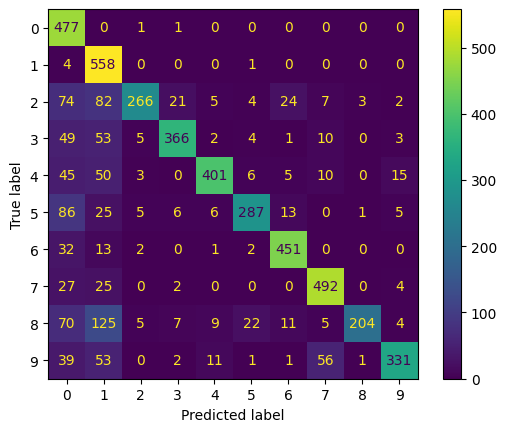

In [ ]:
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train[:5000], y_train_pred)
plt.show()